In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'],index_col=['date'])
df.head()


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [9]:

df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]

df.head()


,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


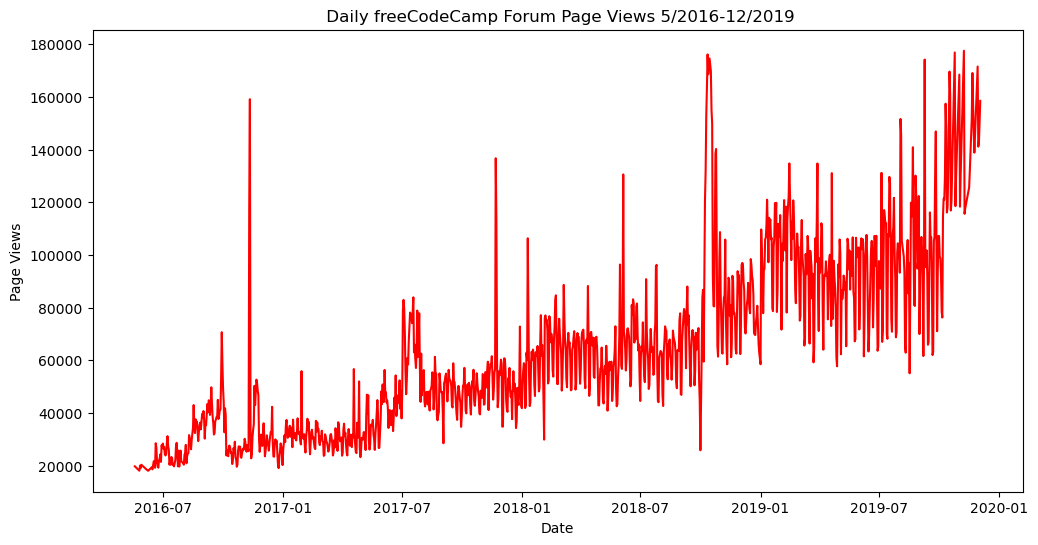

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df['value'],color='Red')
plt.title(' Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()
fig.savefig("line_plot.png")

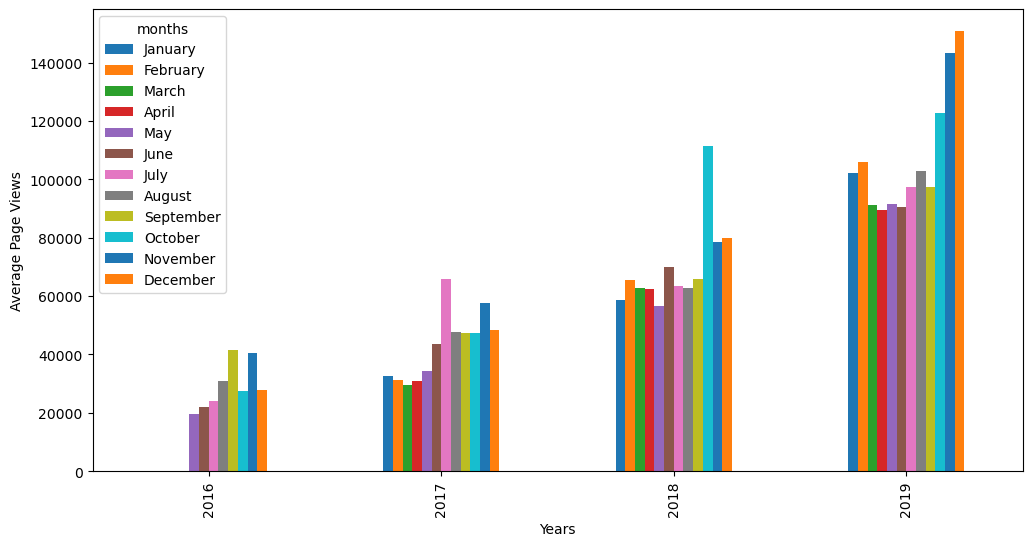

In [24]:

df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month_name()

# Group by year and month, calculate average
df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
# Ensure months order
df_bar = df_bar[['January','February','March','April','May','June',
                 'July','August','September','October','November','December']]
df_bar.plot(kind='bar', figsize=(12,6))
plt.legend(title="months")
plt.xlabel("Years")
plt.ylabel("Average Page Views")
fig.savefig("bar_plot.png")
plt.show()

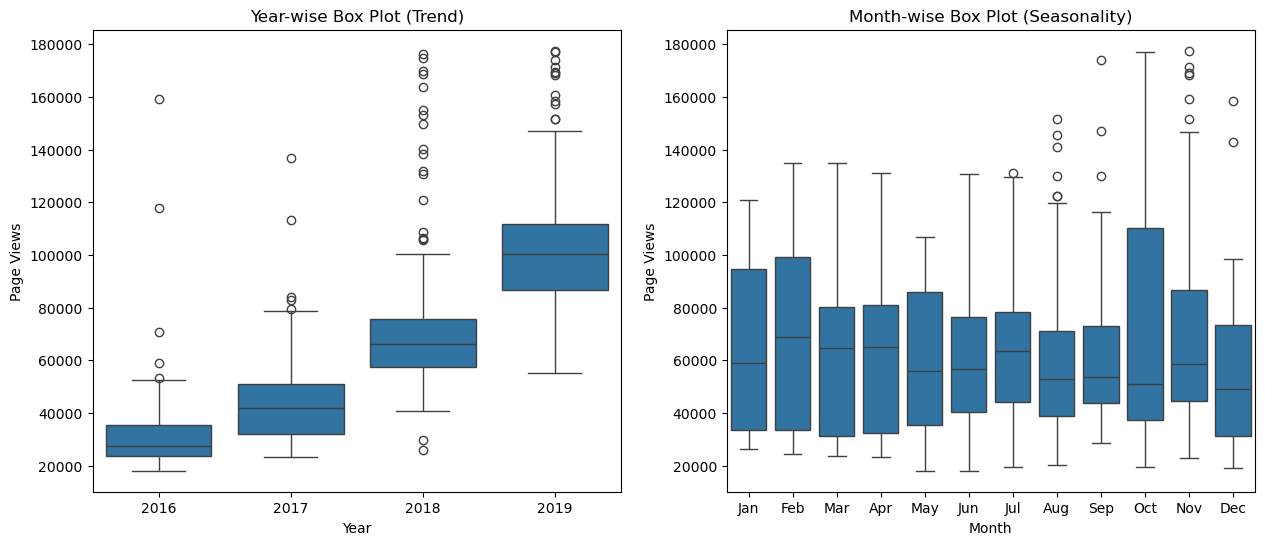

In [23]:


df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = df_box['date'].dt.year
df_box['month'] = df_box['date'].dt.strftime('%b')
df_box['month_num'] = df_box['date'].dt.month
df_box = df_box.sort_values('month_num')

fig, axes = plt.subplots(1, 2, figsize=(15,6))

# Year-wise box plot
sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

# Month-wise box plot
sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")
fig.savefig("box_plot.png")
plt.show()
